# Importing useful libraries and starting setup

In [17]:
#libraries importing

#pd for read doc & dataframe
import pandas as pd
import spacy
#os for files loading
import os
#import re for preprocessing
import re
#import wordcloud to nicely visualise most recurrent words
from wordcloud import WordCloud
#https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb
# importing CountVectorizer to make a bag of words model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
#importing distance metrics to generate a cosine similarity matrix
# importing metrics computing polynomial_kernel with degree=1 and coef0=0
from sklearn.metrics.pairwise import linear_kernel
# importing metrics computing L2-normalized dot product of vectors
from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics.pairwise import cosine_similarity
# tf-idf functionality in sklearn.feature_extraction.text can produce normalized vectors,
# in which case cosine_similarity is equivalent to linear_kernel, only slower.
# source: https://scikit-learn.org/stable/modules/metrics.html

from nltk.tokenize import word_tokenize

#NER methods
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tag import pos_tag
from nltk import ne_chunk_sents

In [30]:
#models importing

#load only sm
nlp_sm = spacy.load('en_core_web_sm')

#for NEr
nltk.download('maxent_ne_chunker')
nltk.download('words')

stopwords_en = spacy.lang.en.stop_words.STOP_WORDS

# dealing with ValueError: [E088] Text of length 7539328 exceeds maximum of 1000000.
# The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input.
# This means long texts may cause memory allocation errors. If you're not using the parser or NER,
# it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters,
# so you can check whether your inputs are too long by checking `len(text)`.
nlp_sm.max_length = 8000000 #7539328

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Fra\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Fra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


In [12]:
# LOADING FILES NB
START_PATH = os.path.dirname(os.getcwd())
NEWS_PATH = os.path.join(START_PATH + r'\assets\news_data.json')
CASE_PATH = os.path.join(START_PATH + r'\assets\case_data.json')
USECASES = os.path.join(START_PATH + r'\data\springboard_ai_usecases.csv')
#added for completeness but not used
ENTITIES_PATH = os.path.join(START_PATH + r'\data\custom_entities.csv')

news: pd.DataFrame = pd.read_json(NEWS_PATH)
news: pd.DataFrame = pd.json_normalize(news['data'])
case: pd.DataFrame = pd.read_json(CASE_PATH)
case: pd.DataFrame = pd.json_normalize(case['data'])

usecases: pd.DataFrame = pd.read_csv(USECASES, delimiter=';', encoding='cp1252')
#usecols=['Usecase Description', 'Type', 'Industry', 'Impact', 'Data Richness'],

# Preprocessing files to help the model

In [71]:
#PREPROCESSING
#taking small sample of 100 just for testing purpose
publications = news.loc[:, ['title','summary', 'text', 'date']].sample(100)

#sentences for NER recognition
# Tokenize the article into sentences: sentences
sentences = [sent_tokenize(article) for article in publications.text]
# Tokenize each sentence into words: token_sentences
token_sentences = [[word_tokenize(sent) for sent in sentence] for sentence in sentences]
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [[pos_tag(sent) for sent in token_sentence] for token_sentence in token_sentences]
# Create the named entity chunks: chunked_sentences
chunked_sentences = [[ne_chunk_sents(sent, binary=True) for sent in pos_sentence] for pos_sentence in pos_sentences]

# NER part to be reviewed


In [84]:
ners = set()

pos_sentences[0]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences[0], binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)
ners

(NE Amazon/NNP)
(NE DSSTNE/NNP)
(NE AI/NNP)
(NE Google/NNP)
(NE Facebook/NNP)
(NE Microsoft/NNP)
(NE Amazon/NNP)
(NE DSSTNE/NNP)
(NE Amazon/NNP)
(NE DSSTNE/NNP)
(NE Google/NNP)
(NE TensorFlow/NNP)
(NE Google/NNP)
(NE Microsoft/NNP)
(NE Yahoo/NNP)
(NE Google/NNP)
(NE TensorFlow/NNP)
(NE Amazon/NNP)
(NE Amazon/NNP)
(NE DSSTNE/NNP)
(NE TensorFlow/NNP)
(NE Google/NNP)
(NE TensorFlow/NNP)
(NE Amazon/NNP)
(NE DSSTNE/NNP)
(NE Amazon/NNP)


set()

In [ ]:
#TO BE CHECKED

ners = set()

for sentence in sentences:
    def get_named_entities(text) -> set:
    doc = nlp_sm(text)
    named_entities = set([ent.text for ent in doc.ents])
    return named_entities

In [ ]:
ners = set()

for pos in pos_sentences:
    c = nltk.ne_chunk_sents(pos, binary=True)
    for s in c:
        if hasattr(c, "label") and c.label() == "NE":
            print(c.label)
            ners.add(c.label)

ners

In [ ]:
# exclude nes
no_nes = [[chunk for chunk in sent if (hasattr(chunk, "label") == False or chunk.label() != "NE")]
       for sent in chunked_sentences]

In [64]:
pos_sentences

[[[('For', 'IN'),
   ('many', 'JJ'),
   ('Russian', 'JJ'),
   ('students', 'NNS'),
   (',', ','),
   ('the', 'DT'),
   ('academic', 'JJ'),
   ('year', 'NN'),
   ('started', 'VBD'),
   ('last', 'JJ'),
   ('Friday', 'NNP'),
   ('with', 'IN'),
   ('tips', 'NNS'),
   ('on', 'IN'),
   ('planetary', 'JJ'),
   ('domination', 'NN'),
   ('from', 'IN'),
   ('President', 'NNP'),
   ('Vladimir', 'NNP'),
   ('Putin', 'NNP'),
   ('.', '.')],
  [('“', 'JJ'),
   ('Artificial', 'NNP'),
   ('intelligence', 'NN'),
   ('is', 'VBZ'),
   ('the', 'DT'),
   ('future', 'NN'),
   (',', ','),
   ('not', 'RB'),
   ('only', 'RB'),
   ('for', 'IN'),
   ('Russia', 'NNP'),
   ('but', 'CC'),
   ('for', 'IN'),
   ('all', 'DT'),
   ('humankind', 'NN'),
   (',', ','),
   ('”', 'NN'),
   ('he', 'PRP'),
   ('said', 'VBD'),
   (',', ','),
   ('via', 'IN'),
   ('live', 'JJ'),
   ('video', 'NN'),
   ('beamed', 'VBD'),
   ('to', 'TO'),
   ('16,000', 'CD'),
   ('selected', 'VBN'),
   ('schools', 'NNS'),
   ('.', '.')],
  [('“',

In [65]:
no_nes

[[Tree('S', [('For', 'IN'), ('many', 'JJ'), Tree('NE', [('Russian', 'JJ')]), ('students', 'NNS'), (',', ','), ('the', 'DT'), ('academic', 'JJ'), ('year', 'NN'), ('started', 'VBD'), ('last', 'JJ'), ('Friday', 'NNP'), ('with', 'IN'), ('tips', 'NNS'), ('on', 'IN'), ('planetary', 'JJ'), ('domination', 'NN'), ('from', 'IN'), ('President', 'NNP'), Tree('NE', [('Vladimir', 'NNP'), ('Putin', 'NNP')]), ('.', '.')]),
  Tree('S', [('“', 'JJ'), ('Artificial', 'NNP'), ('intelligence', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('future', 'NN'), (',', ','), ('not', 'RB'), ('only', 'RB'), ('for', 'IN'), Tree('NE', [('Russia', 'NNP')]), ('but', 'CC'), ('for', 'IN'), ('all', 'DT'), ('humankind', 'NN'), (',', ','), ('”', 'NN'), ('he', 'PRP'), ('said', 'VBD'), (',', ','), ('via', 'IN'), ('live', 'JJ'), ('video', 'NN'), ('beamed', 'VBD'), ('to', 'TO'), ('16,000', 'CD'), ('selected', 'VBN'), ('schools', 'NNS'), ('.', '.')]),
  Tree('S', [('“', 'NN'), ('Whoever', 'NNP'), ('becomes', 'VBZ'), ('the', 'DT'), ('leade

In [63]:
s = ['The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character.',
 'If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic.',
 'Uber wanted to know as much as possible about the people who use its service, and those who don’t.',
 'It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies.',
 'Even if their email was notionally anonymised, this use of it was not something the users had bargained for.',
 'Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.',
 'Uber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hire a driver, be given false reports about the location of its cars.',
 'Uber management booked and then cancelled rides with a rival taxi-hailing company which took their vehicles out of circulation.',
 'Uber deny this was the intention.',
 'The punishment for this behaviour was negligible.',
 'Uber promised not to use this “greyball” software against law enforcement – one wonders what would happen to someone carrying a knife who promised never to stab a policeman with it.',
 'Travis Kalanick of Uber got a personal dressing down from Tim Cook, who runs Apple, but the company did not prohibit the use of the app.',
 'Too much money was at stake for that.',
 'Millions of people around the world value the cheapness and convenience of Uber’s rides too much to care about the lack of drivers’ rights or pay.',
 'Many of the users themselves are not much richer than the drivers.',
 'The “sharing economy” encourages the insecure and exploited to exploit others equally insecure to the profit of a tiny clique of billionaires.',
 'Silicon Valley’s culture seems hostile to humane and democratic values.',
 'The outgoing CEO of Yahoo, Marissa Mayer, who is widely judged to have been a failure, is likely to get a $186m payout.',
 'This may not be a cause for panic, any more than the previous hero worship should have been a cause for euphoria.',
 'Yet there’s an urgent political task to tame these companies, to ensure they are punished when they break the law, that they pay their taxes fairly and that they behave responsibly.']

def ner_not(token):
    pt = pos_tag(token)
    chunk = ne_chunk_sents(pt, binary=True)
    if hasattr(chunk, "label") and chunk.label() == "NE":
        print(chunk)
        return False
    else:
        return True

no_nes = [[t for t in token_sentence if ner_not(t)] for token_sentence in token_sentences]
#no_nes

[<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x000002084AB0A9C8>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x000002084AB0ABC8>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x000002084AB0ACC8>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x000002084AB0AA48>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x000002084AB0AC48>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x000002084AB0AE48>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x000002084AB0AB48>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x000002084AB0AD48>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x000002084AB0ADC8>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x000002084AB0AEC8>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x000002084A78C048>,
 <generator object ParserI.parse_sents.<locals>.<genexpr> at 0x000002084A78C1C8>,
 <generator obje

In [56]:
token_sentences

[[['A',
   'few',
   'years',
   'ago',
   ',',
   'the',
   'startup',
   'Anki',
   'impressed',
   'the',
   'crowd',
   'at',
   'an',
   'Apple',
   'event',
   'by',
   'showing',
   'off',
   'some',
   'toy',
   'race',
   'cars',
   'with',
   'AI',
   'capability',
   'baked',
   'in',
   '.'],
  ['One',
   'would',
   "n't",
   'expect',
   'the',
   'toy-car',
   'giant',
   'Hot',
   'Wheels',
   'to',
   'sit',
   'back',
   'and',
   'let',
   'a',
   'little',
   'startup',
   'do',
   'donuts',
   'all',
   'over',
   'its',
   'turf',
   ',',
   'right',
   '?'],
  ['It',
   'took',
   'a',
   'while',
   ',',
   'but',
   'Hot',
   'Wheels',
   'has',
   'released',
   'its',
   'own',
   'artificial',
   'intelligence',
   'package',
   '.'],
  ['It',
   "'s",
   'similar',
   'to',
   'Anki',
   "'s",
   ',',
   'in',
   'that',
   'it',
   "'s",
   'a',
   'slot-cars-without-the-slots',
   'toy',
   'set',
   ',',
   'but',
   'it',
   "'s",
   'both',
   'less',


In [ ]:
# CODE TO BE ADDED

# Tokenize the article: tokens
# tokens =[word_tokenize(article) for article in publications.text]

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [[t.lower() for t in token] for token in tokens]

# Retain alphabetic words: alpha_only
alphas = [[t for t in lower_token if t.isalpha()] for lower_token in lower_tokens]

# Remove all stop words: no_stops
no_stops = [[t for t in alpha if t not in stopwords_en] for alpha in alphas]

In [ ]:
# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)






# Remove punctuation
publications['text_processed'] = \
publications['text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
publications['text_processed'] = \
publications['text_processed'].map(lambda x: x.lower())

# importing stopwords from spacy
# additional stopwords should be added to help model processing later
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS
# stop word example: https://medium.com/@makcedward/nlp-pipeline-stop-words-part-5-d6770df8a936

# joining into single long text
long_string = ','.join(list(publications.loc[:, 'text_processed'].values))

#extracting named entities to add them to the stopwords later
def get_named_entities(text) -> set:
    doc = nlp_sm(text)
    named_entities = set([ent.text for ent in doc.ents])
    return named_entities

# udpate temporarily removed due to
# MemoryError: Unable to allocate 1.45 GiB for an array with shape (1351203, 288) and data type float32
#spacy_stopwords.update(get_named_entities(long_string))
#to be replaced with filtering on NER detection

# Function to preprocess text
def preprocess(text):
  	# Create Doc object
    # loading nlp keeping standard pipeline #https://spacy.io/usage/processing-pipelines
    # in particular ner to remove names later
    doc = nlp_sm(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas
            if lemma.isalpha() and lemma not in spacy_stopwords]
    return ' '.join(a_lemmas)

# Apply preprocess to ted['transcript']
publications['text_processed'] = publications['text_processed'].apply(preprocess)

# Showing two examples
publications.head(2)

## Removal of names identified through NER (to be discussed ?)
In theory it should help the model rather than keeping names in the hope that reseachers/companies will
help the model to detect use cases.

# Overview of most common words
Showing most common words in all the documents to identify possible additional words to be added
## Words cloud

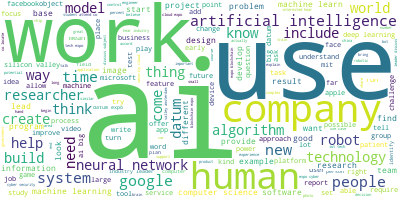

In [129]:
#join all publications into single strings to check most recurrent words in ALL documnets
long_string = ','.join(list(publications.loc[:, 'text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## Frequency dictionary

In [130]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(long_string)
# sort the dictionary. reverse starting most common ones
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results for top 5
print(r'Absolute frequency', '\n',list(word_freq.items())[:5])
print(r'Relative frequency', '\n', list(rel_freq.items())[:5])

Absolute frequency 
 [('ai', 3371), ('use', 3037), ('work', 2926), ('company', 2294), ('human', 2049)]
Relative frequency 
 [('ai', 1.0), ('use', 0.9009196084247998), ('work', 0.8679916938593889), ('company', 0.6805102343518243), ('human', 0.6078315040047464)]


## Considerations/Notes
Some names were not removed like: google, zurich, zuckerberg

#NLP modelling

## Building a bag of words model (see [Datacamp](https://campus.datacamp.com/courses/feature-engineering-for-nlp-in-python/n-gram-models?ex=1))
How to implement in a model to be discussed

In [131]:
# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(list(publications.loc[:, 'text_processed'].values))

# Convert bow_matrix into a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray())

# Map the column names to vocabulary
bow_df.columns = vectorizer.get_feature_names()

# Print bow_df
bow_df

,aa,aaa,aaai,aah,aalto,aamir,aaron,aaronson,aashin,aauw,...,zunger,zurich,zvei,zymergen,zzzkbot,école,łukasz,λxy,旷视,ﬁrst
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1622,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1624,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
#printing a few examples
print(f'zuckerberg frequency: {bow_df.loc[:,"zuckerberg"].sum()}', '\n',
      f'ai frequency: {bow_df.loc[:,"ai"].sum()}')

zuckerberg frequency: 63 
 ai frequency: 8182


## Identifying similar articles (see [Datacamp](https://campus.datacamp.com/courses/feature-engineering-for-nlp-in-python/tf-idf-and-similarity-scores?ex=11))

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

#testing with one publication
publication_title = publications.iloc[0,0]
publication_text = publications.iloc[0,2]

def pubblication_similarity(publication_title, publication_text):
    cases = case.loc[:, ['name', 'description']]
    cases = case.append({'name': publication_title , 'description': publication_text}, ignore_index=True)
    cases.loc[cases.name == publication_title, :]
    # Generate mapping between names and index
    # Replacing metadata with cases
    indices = pd.Series(cases.index, index=cases['name']) #.drop_duplicates()

    def get_recommendations(name, cosine_sim, indices):
        # Get index of movie that matches name
        idx = indices[name]
        # Sort the cases based on the similarity scores
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        # Get the scores for 10 most similar cases plus the found one
        # using all scores
        # sim_scores = sim_scores[1:11]
        # Get the movie indices
        # using only relative weights
        cases_indices = [i[0] for i in sim_scores]

        # Return the top 10 most similar cases
        return pd.DataFrame(dict(zip(cases['name'].iloc[cases_indices], sim_scores)))

    # Initialize the TfidfVectorizer
    tfidf = TfidfVectorizer(stop_words='english')

    # Construct the TF-IDF matrix
    tfidf_matrix = tfidf.fit_transform(cases.loc[:, 'description'])

    # Generate the cosine similarity matrix
    cosine_sim = linear_kernel(tfidf_matrix)

    # Generate recommendations
    return get_recommendations(publication_title, cosine_sim, indices)

In [134]:
df = pd.DataFrame(columns=list(case.name.unique()) + ['publication'])
for i in range(0, len(publications)):
    publication_title = publications.iloc[i, 0]
    publication_text = publications.iloc[i, 2]
    similarity = pubblication_similarity(publication_title, publication_text)
    s = similarity.iloc[1,1:].append(pd.Series([publication_title], index=['publication']))
    df = df.append(s, ignore_index=True)

In [135]:
df.loc[:, df.columns != 'publication'].max().sort_values(ascending=False)

Vision systems                       0.401984
Content Generation                   0.360422
AI developer                         0.349432
Image recognition library/SDK/API    0.333825
Deep learning library/SDK/API        0.329602
                                       ...   
Robotic Process Automation (RPA)     0.099197
PR analytics                         0.098058
Sales rep chat/email bot             0.097932
Sales attribution                    0.095502
Sales compensation                   0.087427
Length: 122, dtype: float64

# TO BE CHECKED
BERT classification
TFID